## Model Training

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for binary classification (tumor or no tumor)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Sigmoid activation for binary classification

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the convolutional base to prevent weights from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with the correct argument for learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define data directories
train_data_dir = "D:/2nd year/2nd sem/PRJ202/datasets/train/"
val_data_dir = "D:/2nd year/2nd sem/PRJ202/datasets/validation/"

# Set batch size
batch_size = 32

# Data preprocessing without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size)

# Evaluate the model on train, validation, and test data
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.samples // batch_size)
val_loss, val_accuracy = model.evaluate(val_generator, steps=val_generator.samples // batch_size)

print("Train Loss:", train_loss, "Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss, "Validation Accuracy:", val_accuracy)


Found 15660 images belonging to 2 classes.
Found 3915 images belonging to 2 classes.
Epoch 1/15
489/489 ━━━━━━━━━━━━━━━━━━━━ 3628s 7s/step - accuracy: 0.7859 - loss: 0.4548 - val_accuracy: 0.8847 - val_loss: 0.2792
Epoch 2/15
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9375 - loss: 0.2154 - val_accuracy: 0.8182 - val_loss: 0.2555
Epoch 3/15
489/489 ━━━━━━━━━━━━━━━━━━━━ 1962s 4s/step - accuracy: 0.9002 - loss: 0.2602 - val_accuracy: 0.8968 - val_loss: 0.2642
Epoch 4/15
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9062 - loss: 0.1895 - val_accuracy: 0.8182 - val_loss: 0.3594
Epoch 5/15
489/489 ━━━━━━━━━━━━━━━━━━━━ 2019s 4s/step - accuracy: 0.9166 - loss: 0.2168 - val_accuracy: 0.9183 - val_loss: 0.2006
Epoch 6/15
489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9062 - loss: 0.2390 - val_accuracy: 1.0000 - val_loss: 0.0523
Epoch 7/15
489/489 ━━━━━━━━━━━━━━━━━━━━ 2025s 4s/step - accuracy: 0.9296 - loss: 0.1838 - val_accuracy: 0.9232 - val_loss: 0.2019
Epoch 8/15


In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for binary classification (tumor or no tumor)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Sigmoid activation for binary classification

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the convolutional base to prevent weights from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with the correct argument for learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define data directories
train_data_dir = "D:/2nd year/2nd sem/PRJ202/datasets/train/"
val_data_dir = "D:/2nd year/2nd sem/PRJ202/datasets/validation/"

# Set batch size
batch_size = 64

# Data preprocessing without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size)

# Evaluate the model on train, validation, and test data
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.samples // batch_size)
val_loss, val_accuracy = model.evaluate(val_generator, steps=val_generator.samples // batch_size)

print("Train Loss:", train_loss, "Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss, "Validation Accuracy:", val_accuracy)


Found 15660 images belonging to 2 classes.
Found 3915 images belonging to 2 classes.
Epoch 1/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 876s 4s/step - accuracy: 0.7807 - loss: 0.4706 - val_accuracy: 0.8770 - val_loss: 0.3049
Epoch 2/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9062 - loss: 0.2813 - val_accuracy: 0.6364 - val_loss: 0.5270
Epoch 3/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 1047s 4s/step - accuracy: 0.8976 - loss: 0.2786 - val_accuracy: 0.8975 - val_loss: 0.2471
Epoch 4/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8906 - loss: 0.2982 - val_accuracy: 0.9091 - val_loss: 0.2326
Epoch 5/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 874s 4s/step - accuracy: 0.9116 - loss: 0.2310 - val_accuracy: 0.9201 - val_loss: 0.2127
Epoch 6/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9219 - loss: 0.2162 - val_accuracy: 0.9091 - val_loss: 0.3738
Epoch 7/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 883s 4s/step - accuracy: 0.9277 - loss: 0.1925 - val_accuracy: 0.9288 - val_loss: 0.1887
Epoch 8/30
244

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Make predictions on the validation set
val_generator.reset()  # Reset the generator for safety
predictions = model.predict(val_generator, steps=val_generator.samples // batch_size + 1)
predicted_classes = np.where(predictions > 0.5, 1, 0).flatten()  # Sigmoid outputs a probability

# Get true labels
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())


123/123 ━━━━━━━━━━━━━━━━━━━━ 391s 3s/step


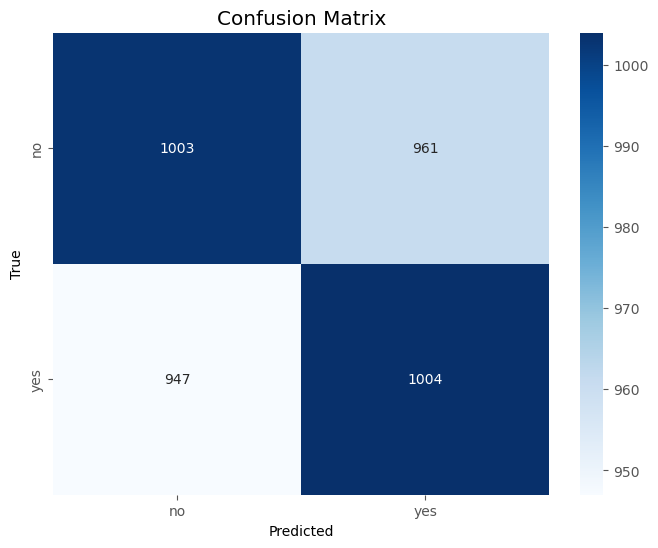

              precision    recall  f1-score   support

          no       0.51      0.51      0.51      1964
         yes       0.51      0.51      0.51      1951

    accuracy                           0.51      3915
   macro avg       0.51      0.51      0.51      3915
weighted avg       0.51      0.51      0.51      3915



In [44]:
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


In [31]:
# Check class indices
class_indices = val_generator.class_indices
print("Class Indices:", class_indices)

yes_count = sum(val_generator.classes == class_indices['yes'])
no_count = sum(val_generator.classes == class_indices['no'])

print("Total 'Yes' (Tumor) Images:", yes_count)
print("Total 'No' (No Tumor) Images:", no_count)

Class Indices: {'no': 0, 'yes': 1}
Total 'Yes' (Tumor) Images: 1951
Total 'No' (No Tumor) Images: 1964


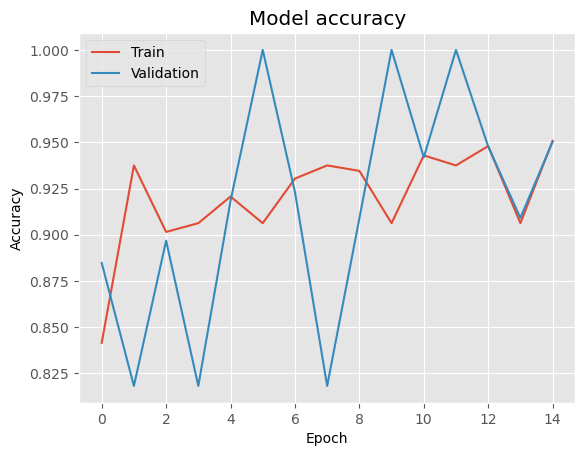

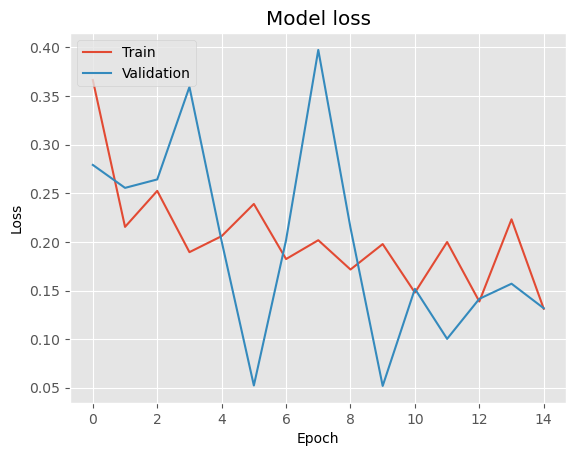

In [45]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [47]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,3

 Total params: 15,109,445 (57.64 MB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 263,172 (1.00 MB)